In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
import sys

In [5]:
sys.path.append('..')

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve, 
    RocCurveDisplay,
    precision_recall_curve,
    PrecisionRecallDisplay
)

from sklego.preprocessing import ColumnSelector

In [7]:
from this_project.censusdata import fetch_censusdata
from this_project.eda.plot import plot_roc_pr_curves
from this_project.censusdata.datasets import NUM_COLS, CAT_COLS

In [8]:
from sklearn import set_config
set_config(display='diagram')

In [9]:
X, y = fetch_censusdata()

In [10]:
preprocessor = make_union(
    make_pipeline(
        ColumnSelector(CAT_COLS),
        SimpleImputer(strategy="constant", fill_value="MISSING"),
        OneHotEncoder(handle_unknown="ignore"),
    ),
    make_pipeline(
        ColumnSelector(NUM_COLS),
        SimpleImputer(strategy="median"),
        StandardScaler()
    )
)

In [11]:
preprocessor.fit(X)

FeatureUnion(transformer_list=[('pipeline-1',
                                Pipeline(steps=[('columnselector',
                                                 ColumnSelector(columns=['workclass',
                                                                         'education',
                                                                         'marital_status',
                                                                         'occupation',
                                                                         'relationship',
                                                                         'race',
                                                                         'sex',
                                                                         'native_country'])),
                                                ('simpleimputer',
                                                 SimpleImputer(fill_value='MISSING',
                                                               strategy='constant')),
                                                ('onehotencoder',
                                                 OneHotEncoder(handle_unknown='ignore'))])),
                               ('pipeline-2',
                                Pipeline(steps=[('columnselector',
                                                 ColumnSelector(columns=['age',
                                                                         'fnlwgt',
                                                                         'education_num',
                                                                         'capital_gain',
                                                                         'capital_loss',
                                                                         'hours_per_week'])),
                                                ('simpleimputer',
                                                 SimpleImputer(strategy='median')),
                                                ('standardscaler',
                                                 StandardScaler())]))])

In [12]:
clf = make_pipeline(
    preprocessor,
    LogisticRegression()
)

In [13]:
clf

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('pipeline-1',
                                                 Pipeline(steps=[('columnselector',
                                                                  ColumnSelector(columns=['workclass',
                                                                                          'education',
                                                                                          'marital_status',
                                                                                          'occupation',
                                                                                          'relationship',
                                                                                          'race',
                                                                                          'sex',
                                                                                          'native_country'])),
                                                                 ('simpleimputer',
                                                                  SimpleImputer(fill_value='MISSING',
                                                                                strategy='constant')),
                                                                 ('onehotencoder',
                                                                  OneHotEncoder(handle_unknown='ignore'))])),
                                                ('pipeline-2',
                                                 Pipeline(steps=[('columnselector',
                                                                  ColumnSelector(columns=['age',
                                                                                          'fnlwgt',
                                                                                          'education_num',
                                                                                          'capital_gain',
                                                                                          'capital_loss',
                                                                                          'hours_per_week'])),
                                                                 ('simpleimputer',
                                                                  SimpleImputer(strategy='median')),
                                                                 ('standardscaler',
                                                                  StandardScaler())]))])),
                ('logisticregression', LogisticRegression())])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.851


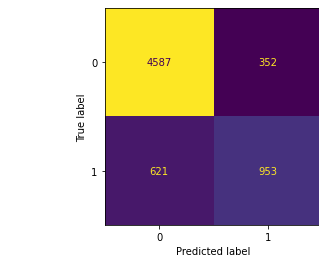

In [15]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

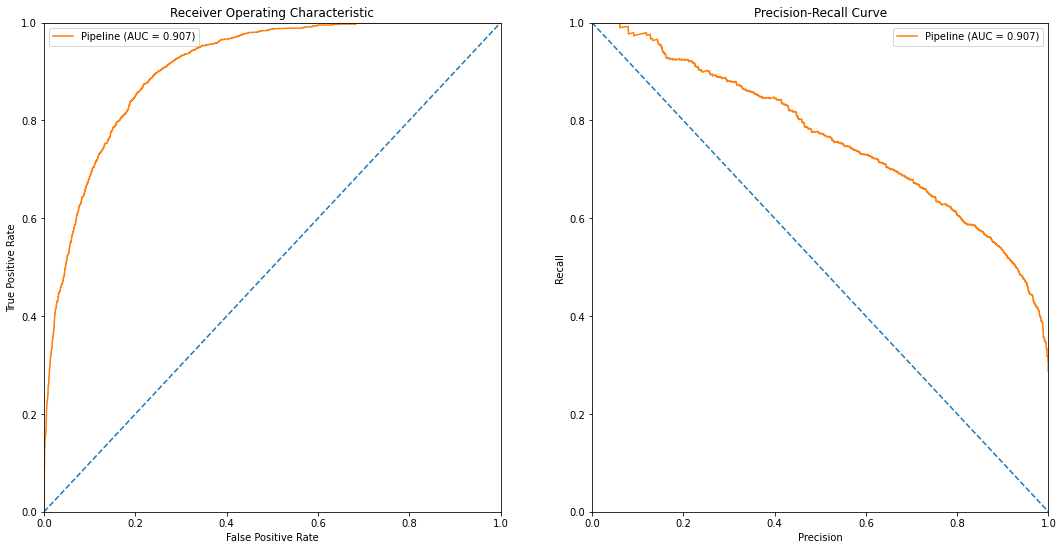

In [16]:
fig = plot_roc_pr_curves(clf, X_test, y_test)

plt.savefig('baseline.roc_pr_curve.png')

In [17]:
y_pred = clf.predict(X_test)

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f'precision: {precision:.5f}; recall: {recall:.5f}; f-score: {fscore:.5f}')

precision: 0.73027; recall: 0.60546; fscore: 0.66204
